In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#Using Pandas to Visualize the data
df = pd.read_csv('data.csv')
print(df)

    Marks in first exam   Marks in second exam   Admit/No admit
0             34.623660              78.024693                0
1             30.286711              43.894998                0
2             35.847409              72.902198                0
3             60.182599              86.308552                1
4             79.032736              75.344376                1
5             45.083277              56.316372                0
6             61.106665              96.511426                1
7             75.024746              46.554014                1
8             76.098787              87.420570                1
9             84.432820              43.533393                1
10            95.861555              38.225278                0
11            75.013658              30.603263                0
12            82.307053              76.481963                1
13            69.364589              97.718692                1
14            39.538339              76.

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,2]
df.head()

,Marks in first exam,Marks in second exam,Admit/No admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [36]:
x = df.iloc[:, :-1]
print(x)
X=x.T
print("x",X)
print("Order of X",X.shape)
y = df.iloc[:, -1]
print(y)
Y=y.reshape(-1,1).T
#y1=Y.reshape(-1,1).T
print(y1)  
print("Order of Y",Y.shape)
#M=X.shape[1]
#print(M)

    Marks in first exam   Marks in second exam
0             34.623660              78.024693
1             30.286711              43.894998
2             35.847409              72.902198
3             60.182599              86.308552
4             79.032736              75.344376
5             45.083277              56.316372
6             61.106665              96.511426
7             75.024746              46.554014
8             76.098787              87.420570
9             84.432820              43.533393
10            95.861555              38.225278
11            75.013658              30.603263
12            82.307053              76.481963
13            69.364589              97.718692
14            39.538339              76.036811
15            53.971052              89.207350
16            69.070144              52.740470
17            67.946855              46.678574
18            70.661510              92.927138
19            76.978784              47.575964
20           

C:\Users\sanbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


NameError: name 'y1' is not defined

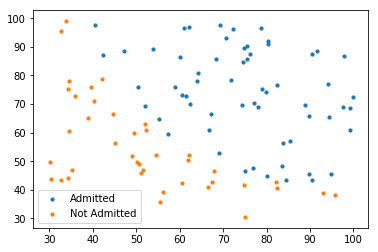

In [37]:
admitted = df.loc[y == 1]

not_admitted = df.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()


In [38]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [39]:
#Check the function
print(sigmoid(1))


0.73105857863


In [40]:
#iNITIALIZE WEIGHTS AND BIAS
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    
    return w, b

In [41]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))
m=X.shape[1]
print("m=",m)
n=X.shape[0]
print("n=",n)

w = [[ 0.]
 [ 0.]]
b = 0
m= 100
n= 2


In [42]:
def propagation(w,b,X,Y):
    #activation 
    m=X.shape[1]
    A= sigmoid(np.dot(w.T,X)+b)
    #print("shape of A=",A.shape)
    #cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    #Back-prop
    dz=A-Y
    #print("shape of dz",dz.shape)
    
    dw=(1/m)*np.dot(X,dz.T)
    #print("shape of dw",dw.shape)
    db=(1/m)*np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost
    
                        
    

In [43]:
#checking Dimensions
#X=np.array([[1,2],[3,4]])

#Y=np.array([1,0])
#W=np.array([1,2])
#b=1
#print(np.dot(w.T,X)+b)

      
#print(np.dot(W.T,X)+b)
#print(propagation(W,b,X,Y))


In [44]:
# Optimize using Gradient Descent Algorithm
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    #while cost>0.001
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagation(w, b, X, Y)
        #if cost<0.005:
         #   break
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [45]:
print("w",w)
print('b=',b)
#print(X)
#print(Y)
params, grads, costs = optimize(w, b, X, Y, num_iterations=400000, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))

print ("db = " + str(grads["db"]))



w [[ 0.]
 [ 0.]]
b= 0


C:\Users\sanbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\sanbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


w = [[ 0.44742342]
 [ 0.44108719]]
b = -53.585401756
dw = [[-2.58855836]
 [-2.31761902]]
db = -0.0421442177471


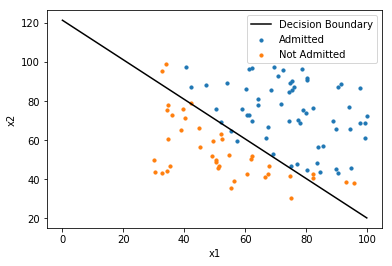

In [47]:
admitted = df.loc[y == 1]

not_admitted = df.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
#plt.legend()
#plt.show()

beta=np.array([-53.585401756,0.44742342,0.44108719] )
#beta=np.array([-25.16131862, 0.20623159, 0.20147149])      
    # plotting points with diff color for diff label 
#plt.scatter([X.values[:, 1]], [X.values[:, 2]], c='b', label='y = 0') 
#plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
x1 = np.arange(0,100, 0.1) 
x2 = -(beta[0] + beta[1]*x1)/beta[2] 
plt.plot(x1, x2, c='k', label='Decision Boundary') 
  
plt.xlabel('x1') 
plt.ylabel('x2') 
plt.legend() 
plt.show() 